# Logistic Regression PyTorch with MNIST
- **Task**: Classification
- **Data**: MNIST Dataset
- **Model**: Logistic Regression
- **Loss function**: Cross Entropy Loss
- **Optimization**: Stochastic Gradient Descent

In [20]:
%load_ext watermark
%watermark -a 'Nguyen Van Sy Thinh' -v -p torch

Author: Nguyen Van Sy Thinh

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0

torch: 2.3.0+cu121



## 1. Import Library

In [14]:
import torch
import torchvision.transforms as transforms
from torchvision import datasets
import matplotlib.pyplot as plt
import time

## 2. Data

### 2.1. MNIST Dataset

In [2]:
# Loading training data
train_dataset = datasets.MNIST(root='./data',
                               train=True,
                               transform=transforms.ToTensor(),
                               download=True)
# Loading test data
test_dataset = datasets.MNIST(root='./data',
                              train=False,
                              transform=transforms.ToTensor())

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 5074370.91it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 137519.02it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1097291.84it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 9037252.74it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



### 2.2. Data Information

In [3]:
print(f"Number of training samples: {len(train_dataset)}")
print(f"Number of testing samples: {len(test_dataset)}")

Number of training samples: 60000
Number of testing samples: 10000


In [4]:
print(f"Datatype of the 1st training sample: {train_dataset[0][0].type()}")
print(f"Size of the 1st training sample: {train_dataset[0][0].size()}")

Datatype of the 1st training sample: torch.FloatTensor
Size of the 1st training sample: torch.Size([1, 28, 28])


### 2.3. Data Visualization

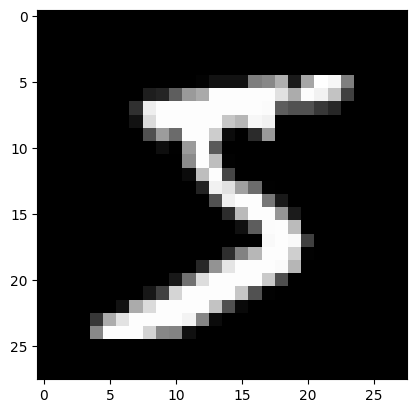

In [5]:
img_5 = train_dataset[0][0].numpy().reshape(28, 28)
plt.imshow(img_5, cmap='gray')
plt.show()

### 2.4. Load Dataset into DataLoader

In [6]:
from torch.utils.data import DataLoader

# Load train and test data samples into dataloader
batach_size = 32
train_loader = DataLoader(dataset=train_dataset, batch_size=batach_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batach_size, shuffle=False)

## 3. Model

In [7]:
import torch
import torch.nn as nn

class LinearRegressionModel(nn.Module):
    def __init__(self, n_inputs, n_outputs):
        super().__init__()
        self.linear = nn.Linear(n_inputs, n_outputs)

    def forward(self, x):
        output = torch.sigmoid(self.linear(x))
        return output

In [8]:
N_INPUTS = 28*28 # makes a 1D vector of 784
N_OUTPUTS = 10

In [9]:
model = LinearRegressionModel(n_inputs=N_INPUTS, n_outputs=N_OUTPUTS)

## 4. Loss Function and Optimization

In [10]:
LR = 0.001
EPOCHS = 50

In [11]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=LR)

## 5. Train

In [15]:
losses = []
accs = []
for epoch in range(EPOCHS):
    start_time = time.time()
    # Train
    for i, (images, labels) in enumerate(train_loader):
        outputs = model(images.view(-1, 28*28))
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Validation
    losses.append(loss.item())
    correct = 0
    for images, labels in test_loader:
        outputs = model(images.view(-1, 28*28))
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum().item()
    accuracy = 100 * correct / len(test_dataset)
    accs.append(accuracy)
    print(f'[{epoch}/{EPOCHS}] Epoch, Loss {loss.item():.4f}, Accuracy {accuracy:.4f}, Time: {time.time() - start_time:.4f}')

[0/50] Epoch, Loss 1.9626, Accuracy 80.1600, Time: 9.3828
[1/50] Epoch, Loss 1.9348, Accuracy 81.1200, Time: 10.0477
[2/50] Epoch, Loss 1.9150, Accuracy 81.8100, Time: 11.4044
[3/50] Epoch, Loss 1.8844, Accuracy 82.2400, Time: 11.0906
[4/50] Epoch, Loss 1.8787, Accuracy 82.5300, Time: 11.3849
[5/50] Epoch, Loss 1.8330, Accuracy 82.8600, Time: 8.3539
[6/50] Epoch, Loss 1.8042, Accuracy 83.1000, Time: 9.4537
[7/50] Epoch, Loss 1.8456, Accuracy 83.2900, Time: 9.5351
[8/50] Epoch, Loss 1.8171, Accuracy 83.4600, Time: 9.8143
[9/50] Epoch, Loss 1.8805, Accuracy 83.7900, Time: 8.6857
[10/50] Epoch, Loss 1.7479, Accuracy 83.8900, Time: 9.2616
[11/50] Epoch, Loss 1.7503, Accuracy 84.0700, Time: 9.2904
[12/50] Epoch, Loss 1.7684, Accuracy 84.2300, Time: 10.2136
[13/50] Epoch, Loss 1.7758, Accuracy 84.3600, Time: 8.4900
[14/50] Epoch, Loss 1.7613, Accuracy 84.4900, Time: 9.1829
[15/50] Epoch, Loss 1.7904, Accuracy 84.5500, Time: 9.2315
[16/50] Epoch, Loss 1.7845, Accuracy 84.7400, Time: 10.0184
[

## 6. Inference

### 6.1. Loss Visualization

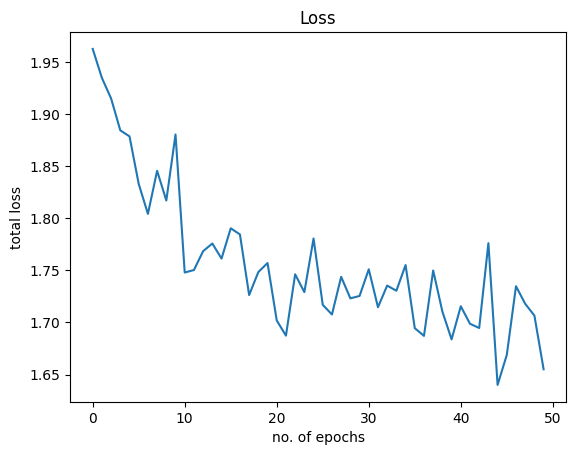

In [16]:
plt.plot(losses)
plt.xlabel("no. of epochs")
plt.ylabel("total loss")
plt.title("Loss")
plt.show()

### 6.2. Accuracy

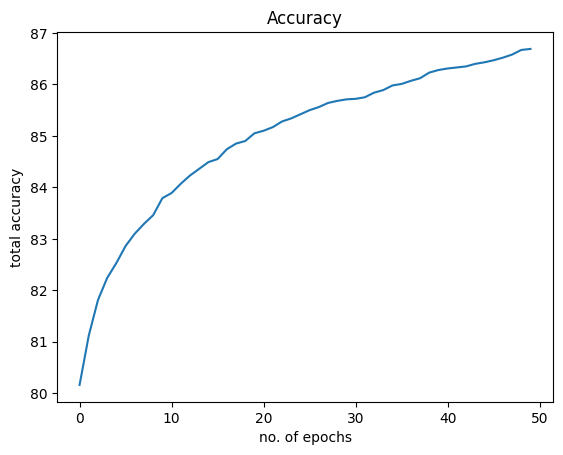

In [17]:
plt.plot(accs)
plt.xlabel("no. of epochs")
plt.ylabel("total accuracy")
plt.title("Accuracy")
plt.show()